<a href="https://colab.research.google.com/github/3ndung/NLP_CLASSIFICATION_LSTM_SIMPLE/blob/main/LOAD_MODEL_RNN_BASIC_MULTICLASIFICATION_NLP_NLTK_TYO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library 

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import losses

Cek TF Version

In [ ]:
print(tf.__version__)

2.11.0


Download dataset 

In [ ]:
dataset_dir = os.path.join(os.path.dirname('dataset'), '/content/drive/MyDrive/TYO_NLTK/DTS3/')

In [ ]:
os.listdir(dataset_dir)

['TRAIN', 'TEST', 'dataset_info.json']

SET DATA UNTUK DI TRAIN 

In [ ]:
train_dir = os.path.join(dataset_dir, 'TRAIN')
os.listdir(train_dir)

['EKO', 'HEL', 'OLA']

SET DATA UNTUK DI TEST

In [ ]:
test_dir = os.path.join(dataset_dir, 'TEST')
os.listdir(train_dir)

['EKO', 'HEL', 'OLA']

In [ ]:
sample_file = os.path.join(train_dir, 'EKO/103.txt')

with open(sample_file) as f:
  print(f.read())

lps bisa simpan dana di bank sakit di ruu ppsk


In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/TYO_NLTK/DTS3/TRAIN', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'dpr usul bentuk badan supervisi lps dan ojk di ruu ppsk'
Label 0
Review b'prediksi skor wolves vs brighton di liga inggris 20222023 momentum daniel podence cs keluar dari zona degradasi'
Label 2
Review b'5 alasan marc marquez bakal bantu fabio quartararo juara motogp 2022 nomor 1 penebusan dosa'
Label 2


In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])
print("Label 2 corresponds to", raw_train_ds.class_names[2])

Label 0 corresponds to EKO
Label 1 corresponds to HEL
Label 2 corresponds to OLA


In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/TYO_NLTK/DTS3/TRAIN', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/TYO_NLTK/DTS3/TEST', 
    batch_size=batch_size)

Found 153 files belonging to 3 classes.


## Membuat function untuk menstandarkan/ menseragamkan string input

In [ ]:
def custom_standardization(input_data):
  # Membuat Semua String menjadi Lower String/ huruf kecil Semua
  lowercase = tf.strings.lower(input_data)
  # Menghapus apabila ada html tag
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

## TEXTVECTORIZATION

Adalah pre-processing sebelum proses pembelajaran yang mengubah string mentah kedalam bentuk intger yang dapat dibaca oleh lapisan berikutnya dalam Synapsis/ Layer berikutnya contoh embeding dan denses


In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    # Memanggil fungsi sebelumnya yang mestandarkan semua string input menjadi lower case dan menghilangkan tag html bila ada
    standardize=custom_standardization,
    # Memberikan batasan padding agar panjang matrix sama pada setiap masukan.
    max_tokens=max_features,
    # Output String akan diubah menjadi bentuk integer
    output_mode='int',
    output_sequence_length=sequence_length)

'''
Next, you will call adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.
'''

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)




Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


# Fungsi yang mengubah setiap string text input ke dalam bentuk intger dan menyimpan dalam array, dengan menggunakan vectorize_layer yang telah diset diatas.

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[13], label_batch[13]
print("\nReview -> text_batch[13]", first_review)
print("Label -> Label_batch[13]", raw_train_ds.class_names[first_label])
print("\nVectorized review nya seperti ini \n\n", vectorize_text(first_review, first_label))


Review -> text_batch[13] tf.Tensor(b'hatihati jika kondisi urine seperti ini bisa jadi penyakit ginjal', shape=(), dtype=string)
Label -> Label_batch[13] HEL

Vectorized review nya seperti ini 

 (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[ 92, 177, 347, 419, 157,   7,  11,  10,  57,  16,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  

In [ ]:
print("1693 ---> ",vectorize_layer.get_vocabulary()[1693])
print("395 ---> ",vectorize_layer.get_vocabulary()[395])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1693 --->  dibekukan
395 --->  awas
Vocabulary size: 1953


# Menggubah semua input train, validasi dan test kedalam bentuk integer

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
# Tunning dataset train, validasi dan test dengan AUTOTUNE untuk optimisasi shape data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Layer embedding dimension kita set menjadi 16 , seperti yang sering digunakan dalam panduan, embedding ini hanya dapat digunakan pada integer positiv dan untuk memperbaiki matrix.

In [ ]:
embedding_dim = 16

In [49]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  tf.keras.models.load_model('/content/drive/MyDrive/NLP_MODEL/04032023.h5'),
  layers.Activation('softmax')
])
export_model.compile(loss = losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])



# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

5/5 [==============================] - 1s 5ms/step - loss: 0.5070 - accuracy: 0.8235
0.8235294222831726


In [50]:
['EKO', 'HEL', 'OLA']

['EKO', 'HEL', 'OLA']

# PREDIKSI

In [51]:
examples = ["MotoGP 2015 akan dikenang sebagai salah satu yang paling sengit dalam gelaran kejuaraan dunia balap motor grand prix",
            "Ida Fauziyah menargetkan penyaluran Ekonomi Bantuan Subsidi Upah (BSU) atau BLT Gaji melalui PT Pos",
            "Teknik Dasar Jalan Cepat, Sejarah, dan Manfaat untuk Kesehatan",
            "Covid-19 akan meningkat apabila masayarakat tidak patuh protokol kesehatan",
            "Rencana Impor KRL Bekas Didukung Erick Thohir, tetapi belum mendapat persetujuan kementrian perdagangan & Ekonomi",
            "Inflasi Indonesia Naik Lagi pada Februari 2023"]


#for x in examples:
export_model.predict(examples)

1/1 [==============================] - 0s 145ms/step


array([[0.04102194, 0.21355511, 0.74542296],
       [0.60627884, 0.2853733 , 0.10834786],
       [0.26252413, 0.6733001 , 0.06417571],
       [0.41743478, 0.48485094, 0.0977143 ],
       [0.713723  , 0.17119014, 0.11508685],
       [0.56591463, 0.3146606 , 0.11942475]], dtype=float32)

# FUNGSI UNTUK MEMBUAT VISUALISASI GRAFIK PIE CHART

In [ ]:
def Pie_Chart_Visualization(x):

          # Pie chart, where the slices will be ordered and plotted counter-clockwise:
          labels = ['EKO', 'HEL', 'OLA']
          sizes = export_model.predict(examples)[x].tolist()
          explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

          fig1, ax1 = plt.subplots()
          ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                  shadow=True, startangle=90)
          ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

          plt.show()

# PENGUJIAN PROSENATASE PREDIKSI DALAM BENTUK GRAFIK DARI DATA SAMPLE

'MotoGP 2015 akan dikenang sebagai salah satu yang paling sengit dalam gelaran kejuaraan dunia balap motor grand prix'

1/1 [==============================] - 0s 57ms/step


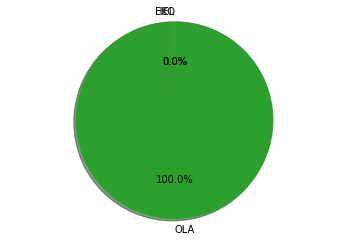

None

'Ida Fauziyah menargetkan penyaluran Ekonomi Bantuan Subsidi Upah (BSU) atau BLT Gaji melalui PT Pos'

1/1 [==============================] - 0s 54ms/step


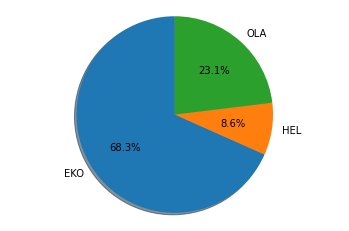

None

'Teknik Dasar Jalan Cepat, Sejarah, dan Manfaat untuk Kesehatan'

1/1 [==============================] - 0s 55ms/step


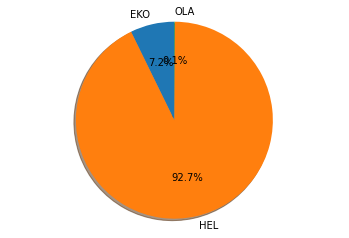

None

'Covid-19 akan meningkat apabila masayarakat tidak patuh protokol kesehatan'

1/1 [==============================] - 0s 54ms/step


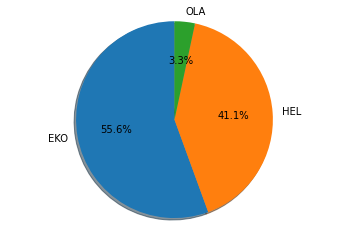

None

'Rencana Impor KRL Bekas Didukung Erick Thohir, tetapi belum mendapat persetujuan kementrian perdagangan & Ekonomi'

1/1 [==============================] - 0s 51ms/step


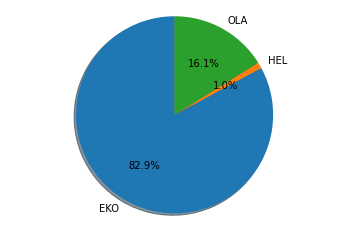

None

'Inflasi Indonesia Naik Lagi pada Februari 2023'

1/1 [==============================] - 0s 59ms/step


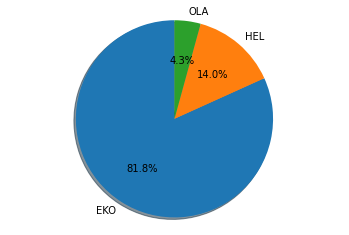

None

In [ ]:
for x in range(len(examples)):
  display(examples[x])
  display(Pie_Chart_Visualization(x))
  print('')

# CONFUSION MATRIX SEBAGAI TAMBAHAN PENDUKUNG UNTUK MEPERJELAS VISUALISASI DIATAS

# CONFUSION MATRIX WITH SKLEARN DARI DATA EXAMPLE PREDIKSI DIATAS

In [ ]:
KNOWLDEGE = '''
examples = ["MotoGP 2015 akan dikenang sebagai salah satu yang paling sengit dalam gelaran kejuaraan dunia balap motor grand prix",
            "Ida Fauziyah menargetkan penyaluran Bantuan Subsidi Upah (BSU) atau BLT Gaji melalui PT Pos",
            "Teknik Dasar Jalan Cepat, Sejarah, dan Manfaat untuk Kesehatan",
            "Covid-19 akan meningkat apabila masayarakat tidak patuh protokol kesehatan",
            "Rencana Impor KRL Bekas: Didukung Erick Thohir, Belum Direstui Kemenperin",
            "Inflasi Indonesia Naik Lagi pada Februari 2023"]


array([[0.2787188 , 0.2602841 , 0.46099707],
       [0.35545906, 0.38726214, 0.2572788 ],
       [0.34048846, 0.5059424 , 0.1535691 ],
       [0.36652344, 0.4425247 , 0.19095181],
       [0.38142797, 0.33325955, 0.28531247],
       [0.39142797, 0.32325955, 0.28531247],], dtype=float32)    

'''               



y_value_true = [2,1,1,1,0,0]  # Knowledge dari user/peneliti
x_value_pred = [2,1,1,1,0,0]  # Value dari nilai prdiksi diambil prosentasi terbesar     
LABEL = ['EKO', 'HEL', 'OLA']    



[[2 0 0]
 [0 3 0]
 [0 0 1]]


Text(33.0, 0.5, 'True')

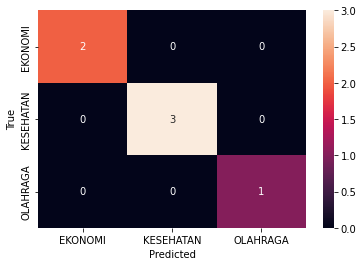

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_value_true, x_value_pred)
#conf_matrix = confusion_matrix([2,1,1,1,0,1], [2,1,1,1,0,0])
print(conf_matrix)


sns.heatmap(
    conf_matrix, annot=True,
    xticklabels= lbl,
    yticklabels= lbl)
plt.xlabel("Predicted")
plt.ylabel("True")

Confusion matrix yang diberikan terdiri dari tiga kelas (class), yaitu kelas EKO, KESEHATAN, dan OLAHRAGA. Kolom merepresentasikan nilai prediksi dan baris merepresentasikan nilai sebenarnya. Oleh karena itu, diagonal utama dari matrix menunjukkan jumlah prediksi yang benar.

Berdasarkan confusion matrix yang diberikan, dapat disimpulkan bahwa:

Kelas pertama memiliki dua prediksi yang benar (true positive), sementara tidak ada prediksi yang salah (false positive) atau salah negatif (false negative) pada kelas ini.
Kelas kedua memiliki tiga prediksi yang benar (true positive), sementara tidak ada prediksi yang salah (false positive) atau salah negatif (false negative) pada kelas ini.
Kelas ketiga memiliki satu prediksi yang benar (true positive), sementara tidak ada prediksi yang salah (false positive) atau salah negatif (false negative) pada kelas ini.
Dengan demikian, dapat disimpulkan bahwa model memiliki performa yang cukup baik untuk memprediksi tiga kelas yang ada, karena tidak terdapat nilai false positive atau false negative pada setiap kelasnya

# TABLE PEMBELAJARAN / LEARNING RATE

In [ ]:
LOSS = [0.7776076197624207,0.5466572642326355,0.4511881172657013,0.41121599078178406]
ACCURACY = [0.7973856329917908,0.843137264251709,0.8562091588973999,0.8562091588973999]
EPOCH = [150,300,450,600]

BASIC = pd.DataFrame()
BASIC['EPOCH'] = EPOCH
BASIC['ACCURACY'] = ACCURACY
BASIC['LOSS'] = LOSS


In [ ]:
display(BASIC)

,EPOCH,ACCURACY,LOSS
0,150,0.797386,0.777608
1,300,0.843137,0.546657
2,450,0.856209,0.451188
3,600,0.856209,0.411216


# Catatan Kesimpulan Sederhana

Data yang diberikan menunjukkan kinerja model pembelajaran mesin selama empat kali latihan (epoch). Setiap epoch melibatkan seluruh data latih, dan akurasi serta kerugian model diukur pada akhir setiap epoch.

Tabel menunjukkan bahwa jumlah data latih meningkat sebanyak 150 pada setiap epoch. Selain itu, metrik akurasi juga menunjukkan peningkatan dari 0,797386 pada epoch pertama menjadi 0,856209 pada epoch ketiga dan keempat, menunjukkan bahwa model belajar dan membuat prediksi yang lebih baik dari waktu ke waktu.

Metrik kerugian juga menurun dari waktu ke waktu, dari 0,777608 pada epoch pertama menjadi 0,411216 pada epoch keempat. Hal ini konsisten dengan peningkatan akurasi model, karena kerugian yang lebih rendah umumnya mengindikasikan kinerja yang lebih baik.

Secara keseluruhan, data tersebut menunjukkan bahwa model meningkatkan kinerjanya dari waktu ke waktu dan membuat prediksi yang lebih baik ketika dilatih dengan lebih banyak data